## WEEK 8, HOMEWORK ASSIGNMENT 
- see Week 8 In-Module Exercises for additional context 
- in that assignment, we mainly focused specifically on fluxes in and around central Illinois
- now we're going to examine fluxes on a broader, global scale!

### What variables are we focusing on in this assignment?
- some of the variables we're interested in, specificially, are
  - **toa_sw_all_mon**: outgoing shortwave (solar) radiative flux (leaving the top of the atmosphere) 
  - **toa_lw_all_mon**: outgoing longwave radiative flux (leaving the top of the atmosphere)
  - **toa_net_all_mon**: net radiative flux at the top of the atmosphere 
  - **solar_mon**:  incoming shortwave (solar) radiative flux at the top of the atmosphere
<br><br>
- some additional details to know, regarding convention for the SIGN of the flux
  - outgoing radiative flux = negative sign
  - incoming radiative flux = positive sign 
  
### Some more details on Earth's energy budget, if you're less familiar
- Image you'll need for this homework: https://mynasadata.larc.nasa.gov/basic-page/earths-energy-budget (if you can't view the graphic below)
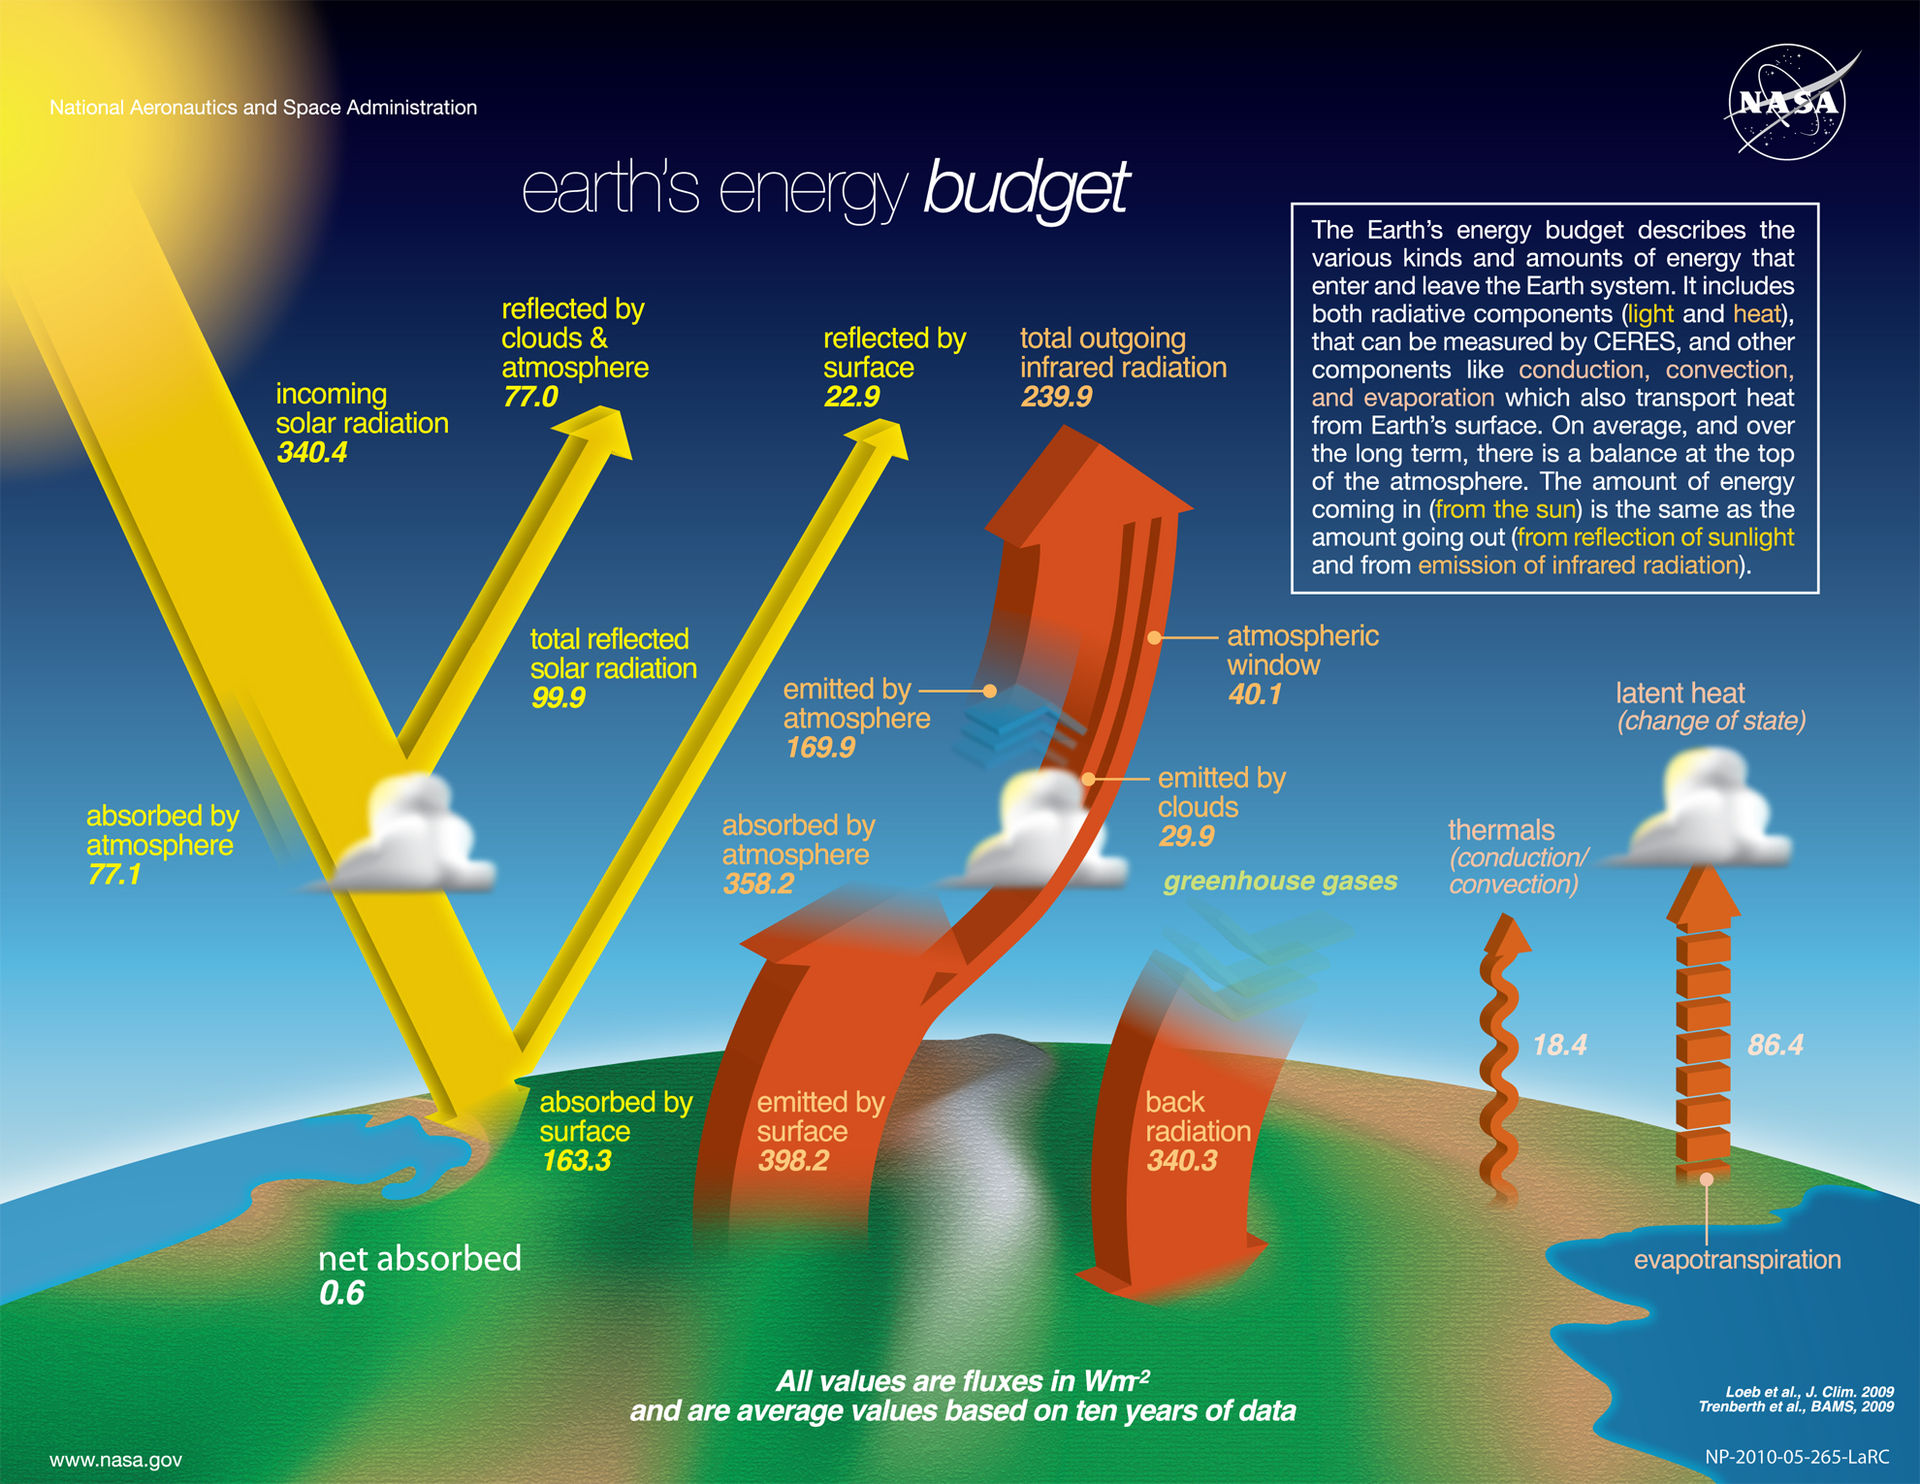

#### (1) Import needed modules + read in the dataset from your in-module assignment.

In [1]:
import xarray as xr
import cartopy.crs as ccrs # Cartopy map projections
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import time
import math
from matplotlib import pyplot as plt


data = xr.open_dataset('https://opendap.larc.nasa.gov/opendap/CERES/EBAF/TOA_Edition4.1/CERES_EBAF-TOA_Edition4.1_200003-202203.nc')
print(data)

<xarray.Dataset> Size: 792MB
Dimensions:                        (lon: 360, lat: 180, ctime: 12, sc: 2,
                                    time: 265)
Coordinates:
  * lon                            (lon) float32 1kB 0.5 1.5 2.5 ... 358.5 359.5
  * lat                            (lat) float32 720B -89.5 -88.5 ... 88.5 89.5
  * ctime                          (ctime) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * time                           (time) datetime64[ns] 2kB 2000-03-15 ... 2...
Dimensions without coordinates: sc
Data variables: (12/67)
    climatology_bounds             (ctime, sc) int32 96B ...
    toa_sw_all_mon                 (time, lat, lon) float32 69MB ...
    toa_lw_all_mon                 (time, lat, lon) float32 69MB ...
    toa_net_all_mon                (time, lat, lon) float32 69MB ...
    toa_sw_clr_c_mon               (time, lat, lon) float32 69MB ...
    toa_lw_clr_c_mon               (time, lat, lon) float32 69MB ...
    ...                             ...
    gtoa_n

In [2]:
print(data.time)

<xarray.DataArray 'time' (time: 265)> Size: 2kB
array(['2000-03-15T00:00:00.000000000', '2000-04-15T00:00:00.000000000',
       '2000-05-15T00:00:00.000000000', ..., '2022-01-15T00:00:00.000000000',
       '2022-02-15T00:00:00.000000000', '2022-03-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-03-15 2000-04-15 ... 2022-03-15
Attributes:
    long_name:  Time
    delta_t:    0000-00-01 00:00:00


#### (2) Take the time-average of each of the four variables of interest, and save each result to a new variable.

In [3]:
out_lw = data['toa_lw_all_mon'].mean(dim='time') # Outgoing longwave
out_sw = data['toa_sw_all_mon'].mean(dim='time') # Outgoing shortwave
net = data['toa_net_all_mon'].mean(dim='time') # Net flux
in_sw = data['solar_mon'].mean(dim='time') # Incoming shortwave

In [4]:
print(in_sw.max(), in_sw.min())

<xarray.DataArray 'solar_mon' ()> Size: 8B
array(415.75723267) <xarray.DataArray 'solar_mon' ()> Size: 8B
array(170.86129761)


#### (3)  Plot the result of (2), i.e., for each of these four variables.  

- a. Incoming solar radiative flux at top of atmosphere
<br><br>
- b. Outgoing shortwave (solar) radiative flux at top of atmosphere
<br><br>
- c. Outgoing longwave radiative flux at top of atmosphere
<br><br>
- d. Net radiative flux at top of atmosphere
<br><br>

**Notes**
- You MUST use the SAME color map for each
- You MUST plot each on a map projection (don't forget your coastlines!). 
- You can use either Xarray w/ Cartopy or directly use Cartopy/Matplotlib to create your plot.
- Don't forget your colorbar for each, colorbar label, title, etc!
<br><br>

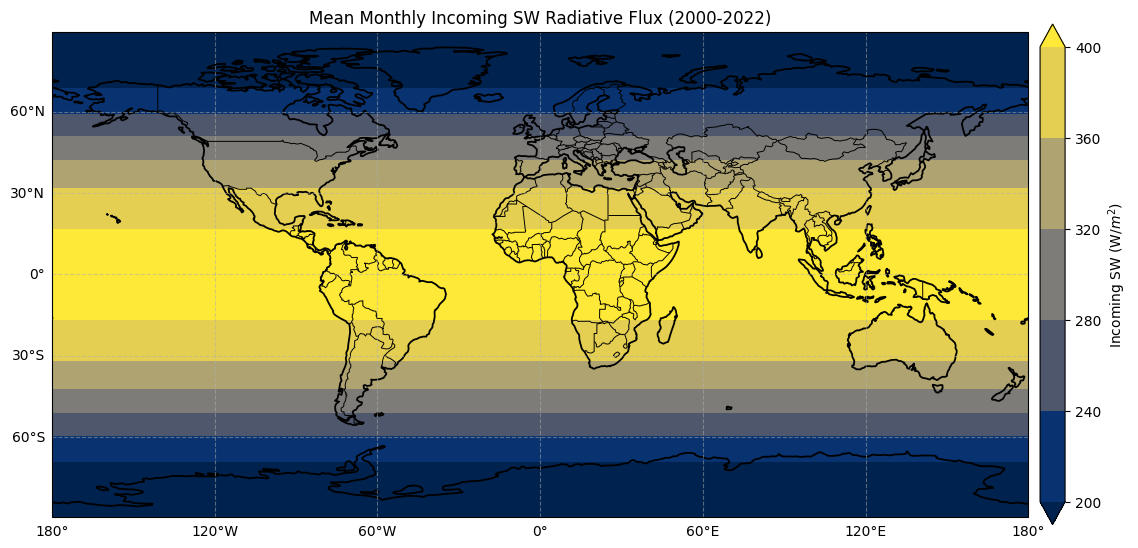

In [5]:
def plot_radiation(flux_da, label):
    """
    Function for plotting radiative fluxes.

    Input:
    - flux_da (DataArray): The data of the variable you want to plot
    - label (str): The label for the variable which will go on the title and colorbar
    """
    proj = ccrs.PlateCarree()
    fig,ax= plt.subplots(subplot_kw=dict(projection=proj),figsize=(15,10))

    lat=data.lat
    lon=data.lon

    flux_da2, lon2 = add_cyclic_point(flux_da, coord=lon)
                        
    cs = ax.contourf(lon2, lat, flux_da2, cmap='cividis', extend='both', transform=proj)

    ax.add_feature(cfeature.COASTLINE, edgecolor="black", linewidths=1.3)
    ax.add_feature(cfeature.BORDERS, edgecolor="black", linewidths=0.7)

    # Colorbar
    cb = fig.colorbar(cs, shrink=0.65, pad=0.01, label=f'{label} (W/$m^2$)')

    # Add gridlines
    gl = ax.gridlines(alpha=0.5, linestyle='--', draw_labels=True)
    gl.bottom_labels = True
    gl.left_labels = True
    gl.top_labels = False
    gl.right_labels = False

    ax.set_title(f'Mean Monthly {label} Radiative Flux (2000-2022)')

# Plot incoming SW
plot_radiation(in_sw, 'Incoming SW')

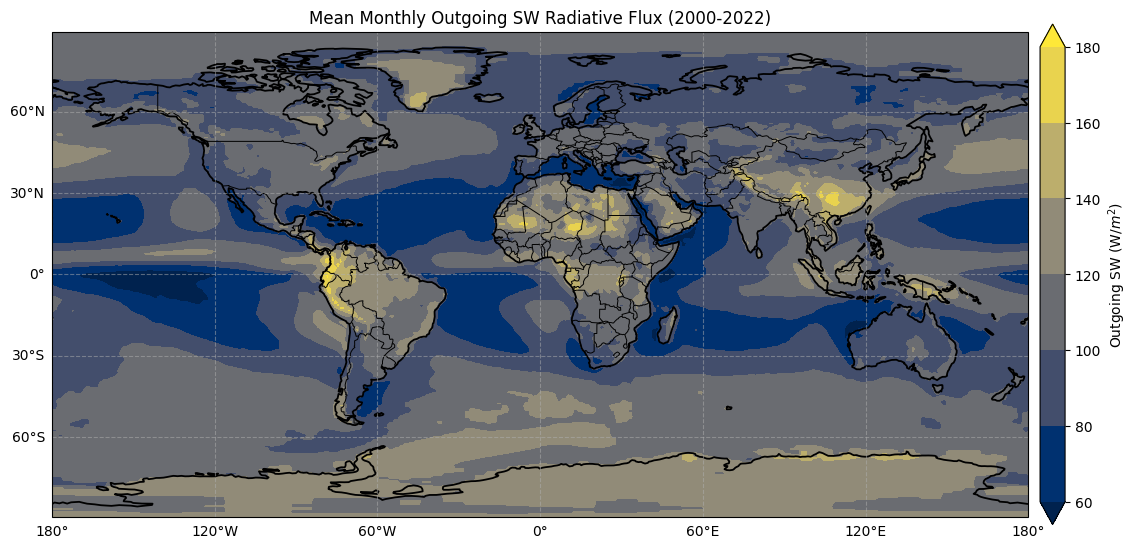

In [6]:
# Outgoing SW
plot_radiation(out_sw, 'Outgoing SW')

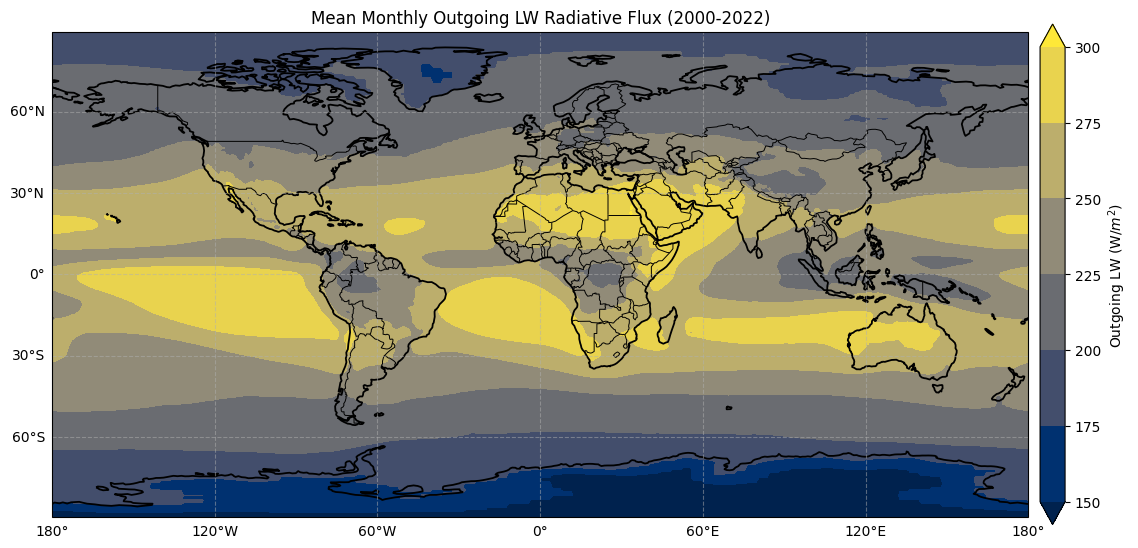

In [7]:
# Outgoing LW
plot_radiation(out_lw, 'Outgoing LW')

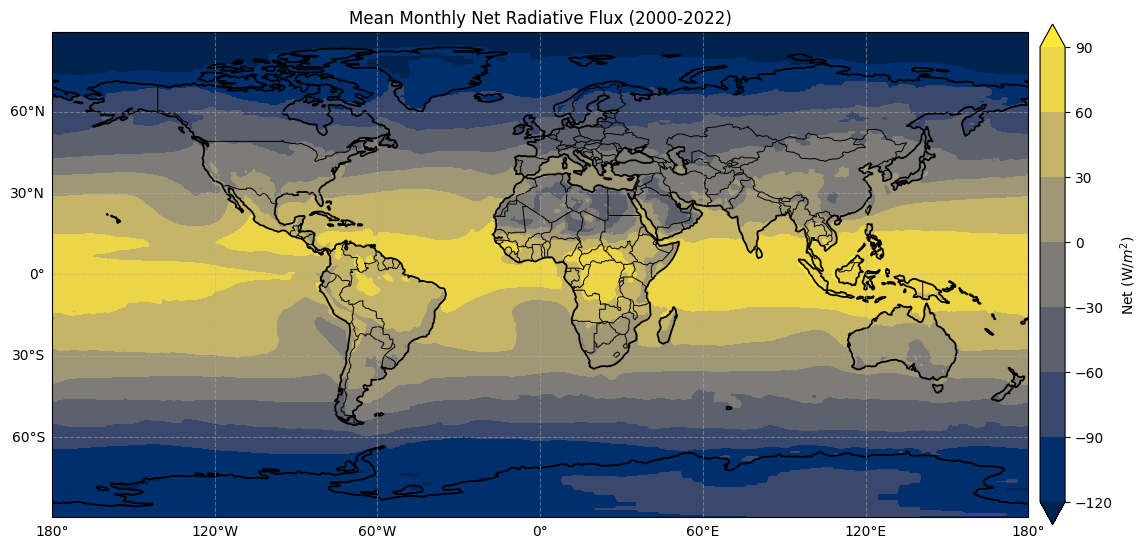

In [8]:
# Net flux
plot_radiation(net, 'Net')

#### (4)  For each plot you produced in (3), in 1-2 sentences for each plot, describe any general patterns you notice.

In [9]:
# For incoming SW, it seems that the radiative flux is zonally uniform, and only changes with latitude. The area around the equator
# also receives the most radiation, while the poles receive the least.

In [10]:
# For outgoing SW, the areas with the least amount are over the oceans, particularly areas just north and south of the equator.
# There does not appear to be a clear pattern in where the areas with the greatest amount of outgoing SW are.

In [11]:
# For outgoing LW, the areas emitting the most radiation are just north and south of the equator, and over land those areas seem to
# be deserts more often than not. The poles, especailly Antarctica, emit the least amount of LW radiation.

In [12]:
# For net flux, the areas around the the equator seem to have the greatest magnitude positive flux, while the poles appear to have
# the greatest magnitude negative flux. 

#### (5)  Evaluate the energy budget, Part I
- a. First, add together incoming solar radiative flux and the outgoing longwave + shortwave radiative fluxes and plot the result like you did in Q3 (using the same colormap as Q3).  
   - Hint: think about the SIGN of each of these quantities....see context at start of homework assignment
<br><br>
- b. Compare, visually, to your plot in Q3 of net radiative flux at top of atmosphere.  Are they the same?
<br><br>
- c. Prove this to yourself quantitatively by calculating and plotting the difference. 

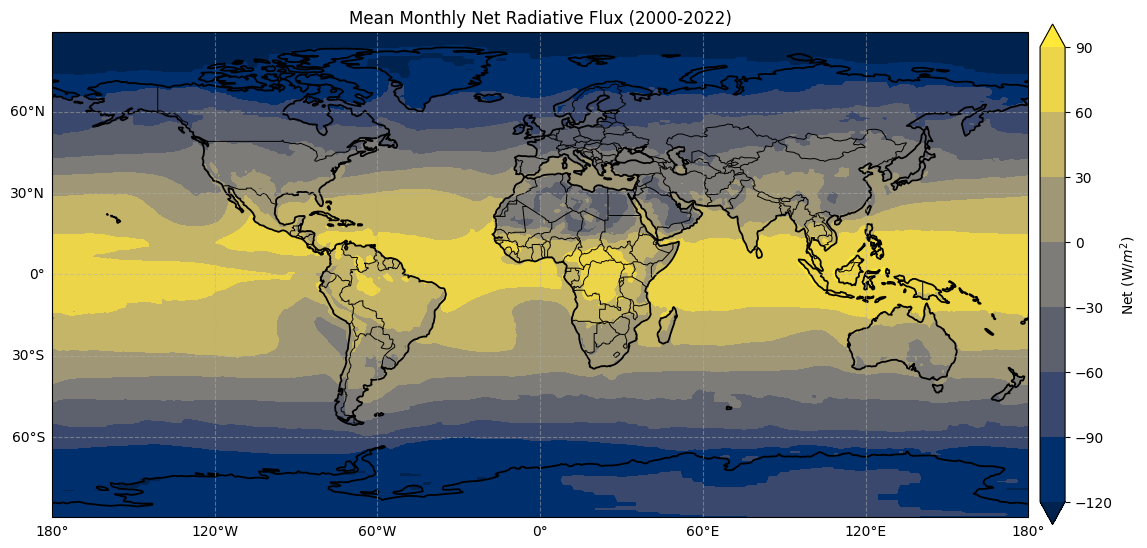

In [13]:
# a.)

# Get net flux by subtracting outgoing from incoming
net_flux_calc = in_sw - out_sw - out_lw

plot_radiation(net_flux_calc, 'Net')

In [14]:
# b.)

# Yes, they appear to be identical plots.

Text(0.5, 1.0, 'Difference Between Calculated and Retrieved Net Flux')

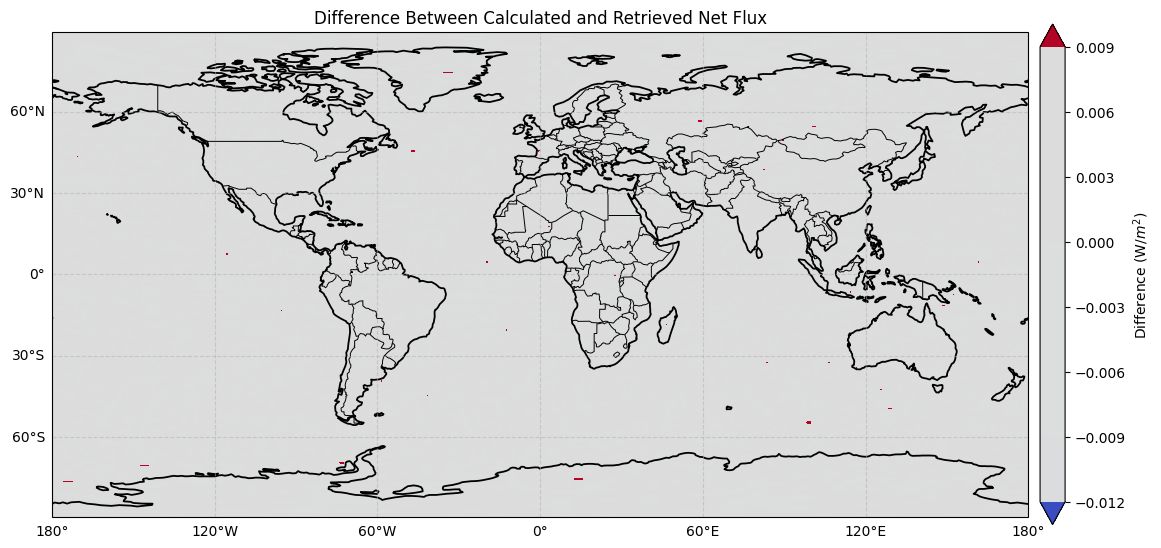

In [ ]:
# c.)
net_diff = net_flux_calc - net # Calculate difference

proj = ccrs.PlateCarree()
fig,ax= plt.subplots(subplot_kw=dict(projection=proj),figsize=(15,10))

lat=data.lat
lon=data.lon

flux_da2, lon2 = add_cyclic_point(net_diff, coord=lon)
                    
cs = ax.contourf(lon2, lat, flux_da2, cmap='coolwarm', vmin=-1, vmax=1, extend='both', transform=proj)

ax.add_feature(cfeature.COASTLINE, edgecolor="black", linewidths=1.3)
ax.add_feature(cfeature.BORDERS, edgecolor="black", linewidths=0.7)

# Colorbar
cb = fig.colorbar(cs, shrink=0.65, pad=0.01, label=f'Difference (W/$m^2$)')

# Add gridlines
gl = ax.gridlines(alpha=0.5, linestyle='--', draw_labels=True)
gl.bottom_labels = True
gl.left_labels = True
gl.top_labels = False
gl.right_labels = False

ax.set_title(f'Difference Between Calculated and Retrieved Net Flux')

In [ ]:
# Yeah it's basically the same.

#### (6) Evaluate the energy budget, Part 2
- now, for the time-averaged net radiative flux at the top of the atmosphere variable (which you already have), take the mean over the whole globe (over all lats and all lons)
<br><br>
- this value is very far, relatively speaking, from 0......what's going on? [We will discuss in Q7]

In [32]:
world_net_flux = net.mean(dim=['lon','lat'])
print(world_net_flux.values)

-28.631918


#### (7)  Evaluate the energy budget, Part 3
- each gridpoint of the dataset is not representative of an equal area of the Earth's surface
- so what we are inherently doing in taking a simple mean is giving equal weight to every gridpoint, which is WRONG!
<br><br>

**Solution**
- taking a *weighted* mean
- your weighting function: cosine(lat)
<br><br>

*Hints*:
  - make sure you understand the input np.cos expects!
<br><br>
  - http://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html offers an excellent example of taking a weighted mean, as well as additional explanation of why we have to take one
<br><br>
  - aka....you'll apply the 'weighted' method of data arrays to your variables BEFORE taking mean
<br><br>

**STEPS**
- (a.) Create your weights
<br><br>
- (b.) Create a line plot of your weights
<br><br>
- (c.) Apply the weighted method to all four data arrays (the time-averaged ones, but not spatial-averaged)
<br><br>
- (d.) Calculate the global mean (over both spatial dimensions) of the *weighted* time-averaged net radiative flux - DO NOT FORGET TO USE THE WEIGHTS
<br><br>
- (e.) Do the same for the other three variables
<br><br>
- (f.) Is your answer in (d.) now closer to zero?
<br><br>
- (g.) Do your global mean of incoming shortwave flux, outgoing shortwave flux, and outgoing longwave flux approximately match with that in the diagram? (See start of homework).

In [ ]:
# a.)

# Convert latitude deg to radians and then take cosine of that
weights = np.cos(np.deg2rad(data.lat))
weights # These are your weights for each lat coordinate

<xarray.DataArray 'lat' (lat: 180)> Size: 720B
array([0.00872656, 0.02617699, 0.04361945, 0.06104851, 0.07845908,
       0.09584576, 0.11320324, 0.13052624, 0.14780948, 0.16504757,
       0.18223551, 0.19936794, 0.21643965, 0.23344542, 0.25037998,
       0.26723838, 0.28401536, 0.30070582, 0.3173047 , 0.33380693,
       0.35020736, 0.3665012 , 0.38268346, 0.3987491 , 0.4146933 ,
       0.43051115, 0.44619778, 0.4617486 , 0.47715878, 0.49242356,
       0.5075384 , 0.5224986 , 0.5372996 , 0.551937  , 0.56640625,
       0.58070296, 0.59482276, 0.6087614 , 0.62251467, 0.6360782 ,
       0.64944804, 0.66262007, 0.67559016, 0.68835455, 0.70090926,
       0.71325046, 0.72537434, 0.7372773 , 0.7489557 , 0.76040596,
       0.77162457, 0.78260815, 0.7933533 , 0.8038569 , 0.8141155 ,
       0.8241262 , 0.83388585, 0.8433914 , 0.85264015, 0.8616291 ,
       0.87035567, 0.87881714, 0.8870108 , 0.89493436, 0.90258527,
       0.9099613 , 0.9170601 , 0.9238795 , 0.9304176 , 0.9366722 ,
       0.9426415 , 0.94832367, 0.95371693, 0.95881975, 0.96363044,
       0.96814764, 0.9723699 , 0.976296  , 0.9799247 , 0.9832549 ,
       0.9862856 , 0.9890159 , 0.9914449 , 0.9935719 , 0.9953962 ,
       0.9969173 , 0.9981348 , 0.99904823, 0.99965733, 0.9999619 ,
       0.9999619 , 0.99965733, 0.99904823, 0.9981348 , 0.9969173 ,
       0.9953962 , 0.9935719 , 0.9914449 , 0.9890159 , 0.9862856 ,
       0.9832549 , 0.9799247 , 0.976296  , 0.9723699 , 0.96814764,
       0.96363044, 0.95881975, 0.95371693, 0.94832367, 0.9426415 ,
       0.9366722 , 0.9304176 , 0.9238795 , 0.9170601 , 0.9099613 ,
       0.90258527, 0.89493436, 0.8870108 , 0.87881714, 0.87035567,
       0.8616291 , 0.85264015, 0.8433914 , 0.83388585, 0.8241262 ,
       0.8141155 , 0.8038569 , 0.7933533 , 0.78260815, 0.77162457,
       0.76040596, 0.7489557 , 0.7372773 , 0.72537434, 0.71325046,
       0.70090926, 0.68835455, 0.67559016, 0.66262007, 0.64944804,
       0.6360782 , 0.62251467, 0.6087614 , 0.59482276, 0.58070296,
       0.56640625, 0.551937  , 0.5372996 , 0.5224986 , 0.5075384 ,
       0.49242356, 0.47715878, 0.4617486 , 0.44619778, 0.43051115,
       0.4146933 , 0.3987491 , 0.38268346, 0.3665012 , 0.35020736,
       0.33380693, 0.3173047 , 0.30070582, 0.28401536, 0.26723838,
       0.25037998, 0.23344542, 0.21643965, 0.19936794, 0.18223551,
       0.16504757, 0.14780948, 0.13052624, 0.11320324, 0.09584576,
       0.07845908, 0.06104851, 0.04361945, 0.02617699, 0.00872656],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Latitude
    standard_name:  latitude
    units:          degrees_north
    valid_range:    [-90.  90.]

Text(0.5, 1.0, 'Weights by Latitude')

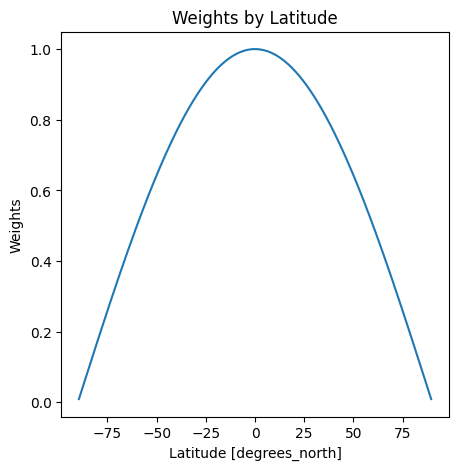

In [25]:
# b.)
fig,ax= plt.subplots(figsize=(5,5))
weights.plot(ax=ax)
ax.set_ylabel('Weights')
ax.set_title('Weights by Latitude')

In [38]:
# c.)

# Apply weights to each array
out_lw_weighted = out_lw.weighted(weights)
out_sw_weighted = out_sw.weighted(weights)
in_sw_weighted = in_sw.weighted(weights)
net_weighted = net.weighted(weights)

In [35]:
# d.)

print('Net weighted mean:',net_weighted.mean(dim=['lon','lat']).values)

Net weighted mean: 1.0543721


In [ ]:
# e.) 
print('Outgoing LW weighted mean:',out_lw_weighted.mean(dim=['lon','lat']).values)
print('Outgoing SW weighted mean:',out_sw_weighted.mean(dim=['lon','lat']).values)
print('Incoming SW weighted mean:',in_sw_weighted.mean(dim=['lon','lat']).values)

Outgoing LW weighted mean: 240.33272
Outgoing SW weighted mean: 98.937454
Incoming SW weighted mean: 340.32462


In [ ]:
# f.)
# Yes, it is much closer to zero. 

In [ ]:
# g.)
# Yes they do. Incoming SW corresponds with the incoming solar radiation, outgoing SW corresponds with the total reflected solar 
# radiation, and outgoing LW corresponds with total outgoing IR.